# Предсказание цены подержанных мотоциклов в Индии

Ссылка на dataset https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india

# 1. EDA

In [1]:
import pandas as pd

df = pd.read_csv('Used_Bikes.csv')
df.sample(5)

,bike_name,price,city,kms_driven,owner,age,power,brand
12201,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
14647,Hero Passion Pro 100cc,32000.0,Delhi,12000.0,First Owner,6.0,100.0,Hero
4608,KTM Duke 390cc,83000.0,Pune,36083.0,First Owner,7.0,390.0,KTM
30902,Yamaha YZF-R15 2.0 150cc,55000.0,Rupnagar,27000.0,First Owner,9.0,150.0,Yamaha
29967,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


Описание полей:
* bike_name - полное наименование
* price - цена (целевая переменная)
* city - город, где продается
* kms_driven - пробег в км.
* owner - номер владельца (первый, второй и т.д.)
* age - возраст велосипеда
* power - мощность двигателя
* brand - производитель

In [3]:
df['bike_name'].value_counts()

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

In [4]:
df['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [5]:
df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

/var/folders/r0/snyqpgt50qg5xzp998l5dld00000gp/T/ipykernel_6360/1357601921.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


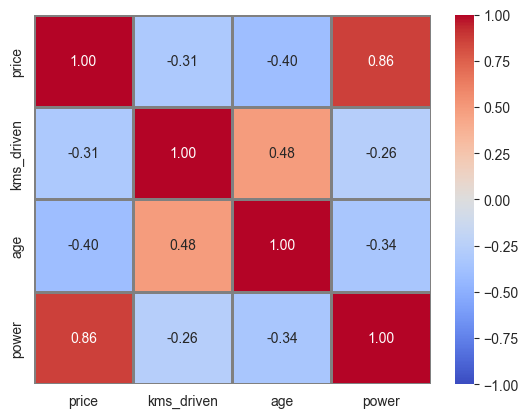

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_edge = 0.85

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, linewidth=1, linecolor='gray', cmap='coolwarm')

plt.show()

<AxesSubplot: xlabel='power', ylabel='price'>

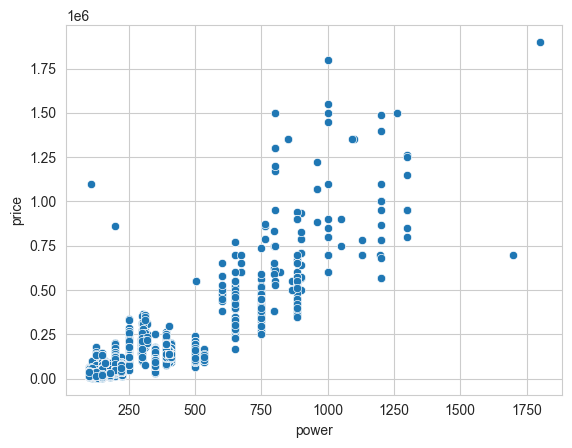

In [7]:
sns.scatterplot(data=df, x=df['power'], y=df['price'])

<AxesSubplot: xlabel='price'>

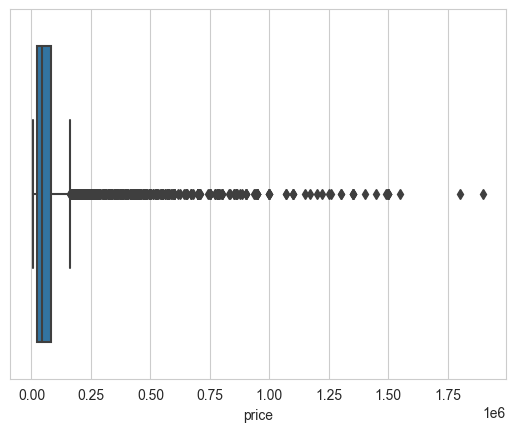

In [21]:
sns.boxplot(df, x='price')

In [23]:
df['price'].describe().apply(lambda x: format(x, 'f'))

count      32648.000000
mean       68295.417637
std        90718.595205
min         4400.000000
25%        25000.000000
50%        43000.000000
75%        80000.000000
max      1900000.000000
Name: price, dtype: object

# 2. Preprocessing & Feature Engineering

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

numeric_transformer = make_pipeline(
    StandardScaler()
)

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

column_transformer = ColumnTransformer(transformers=[
    ('numerical', numeric_transformer, df.drop('price', axis=1).select_dtypes(exclude='object').columns),
    ('categorical', categorical_transformer, df.select_dtypes(include='object').columns)
])

X_train, X_test, y_train, y_test = \
    train_test_split(df.drop('price', axis=1), df['price'], test_size=0.3, random_state=42)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(
    column_transformer,
    GradientBoostingRegressor()
)

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)

mean_squared_error(y_test, prediction, squared=False)

22013.426047995403